In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, DepthwiseConv2D
from keras.layers import SeparableConv2D , Conv2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [3]:
train_features.shape

(50000, 32, 32, 3)

In [4]:
test_features.shape

(10000, 32, 32, 3)

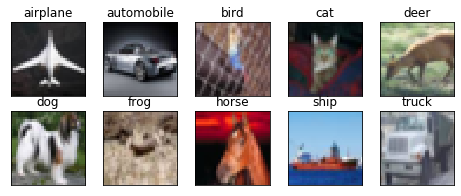

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()





Epoch 1/50





390/390 [==============================] - 24s 61ms/step - loss: 1.8735 - acc: 0.2828 - val_loss: 1.4664 - val_acc: 0.4588
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 1.3723 - acc: 0.5021 - val_loss: 1.1772 - val_acc: 0.5716
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 1.1657 - acc: 0.5815 - val_loss: 0.9932 - val_acc: 0.6475
Epoch 4/50
390/390 [==============================] - 21s 53ms/step - loss: 1.0157 - acc: 0.6421 - val_loss: 0.8725 - val_acc: 0.7026
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9177 - acc: 0.6802 - val_loss: 0.7848 - val_acc: 0.7285
Epoch 6/50
390/390 [==============================] - 21s 54ms/step - loss: 0.8366 - acc: 0.7100 - val_loss: 0.7811 - val_acc: 0.7352
Epoch 7/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7841 - acc: 0.7300 - val_loss: 0.7378 - val_acc: 0.7478
Epoch 8/50
390/390 [==============================] - 

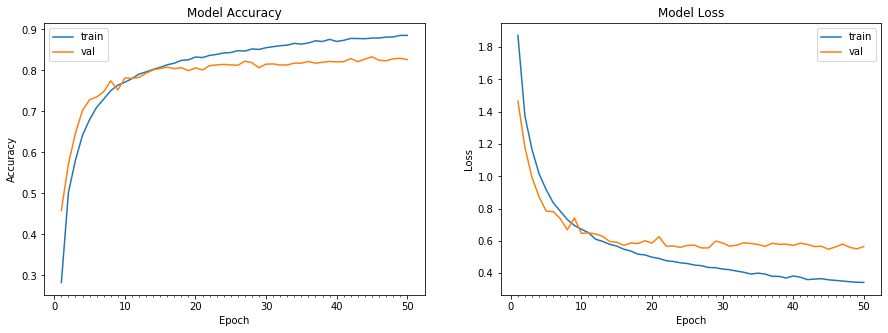

Accuracy on test data is: 82.64


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

***Final Model Architecture***

In [80]:
# Define the model
model1 = Sequential()

#BLOCK 1
model1.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same')) #32*32*64/ RF=3
model1.add(BatchNormalization())

model1.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu'))# 30*30*64 / RF - 5
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))# 30*30*128 / RF - 7
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(MaxPooling2D(pool_size=(2, 2))) #15*15*128 / RF - 8

#BLOCK 2
model1.add(Conv2D(64, 1, 1 , activation='relu')) #15*15*64 / RF - 8
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(96, kernel_size=(3, 3), activation='relu',padding='same')) # 15*15*96 / RF - 12
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu')) #13*13*128 / RF - 16
model1.add(BatchNormalization())
model1.add(Dropout(0.15))

model1.add(MaxPooling2D(pool_size=(2, 2))) #6*6*128 / RF - 18

#FINAL BLOCK
model1.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu')) #4*4*128 / RF - 26
model1.add(BatchNormalization())
model1.add(Dropout(0.15))

model1.add(SeparableConv2D(10, kernel_size=(3, 3), activation='relu')) #2*2*10 / RF - 34
model1.add(BatchNormalization())

model1.add(GlobalAveragePooling2D()) #1*1*10
model1.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`


***Model Summary***

In [81]:
model1.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_166 (Separa (None, 32, 32, 64)        283       
_________________________________________________________________
batch_normalization_178 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
separable_conv2d_167 (Separa (None, 30, 30, 64)        4736      
_________________________________________________________________
batch_normalization_179 (Bat (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_142 (Dropout)        (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_168 (Separa (None, 30, 30, 128)       8896      
_________________________________________________________________
batch_normalization_180 (Bat (None, 30, 30, 128)     

In [0]:
#from keras.callbacks import LearningRateScheduler
#def scheduler(epoch, lr):
#  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

model1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

***Model Training***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50
390/390 [==============================] - 57s 147ms/step - loss: 0.7364 - acc: 0.7509 - val_loss: 0.6998 - val_acc: 0.7661
Epoch 2/50
390/390 [==============================] - 47s 120ms/step - loss: 0.6955 - acc: 0.7643 - val_loss: 0.7000 - val_acc: 0.7646
Epoch 3/50
390/390 [==============================] - 47s 119ms/step - loss: 0.6620 - acc: 0.7749 - val_loss: 0.6598 - val_acc: 0.7786
Epoch 4/50
390/390 [==============================] - 47s 119ms/step - loss: 0.6283 - acc: 0.7861 - val_loss: 0.7131 - val_acc: 0.7602
Epoch 5/50
390/390 [==============================] - 47s 119ms/step - loss: 0.6105 - acc: 0.7933 - val_loss: 0.6360 - val_acc: 0.7849
Epoch 6/50
390/390 [==============================] - 47s 120ms/step - loss: 0.5919 - acc: 0.7976 - val_loss: 0.6502 - val_acc: 0.7810
Epoch 7/50
390/390 [==============================] - 47s 119ms/step - loss: 0.5745 - acc: 0.8037 - val_loss: 0.6177 - val_acc: 0.7886
Epoch 8/50
390/390 [==============================] - 4

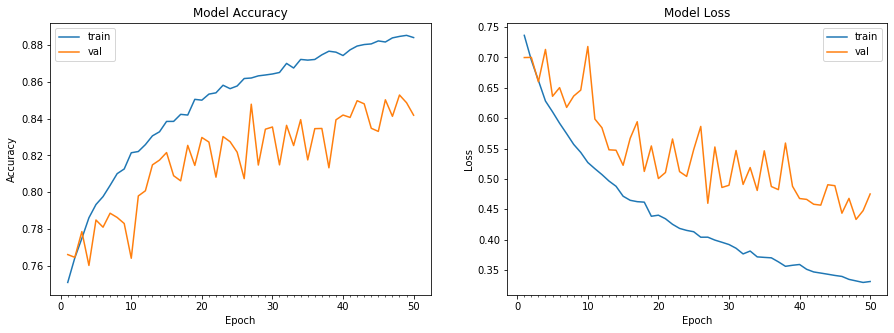

Accuracy on test data is: 84.19


In [85]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=True)

# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
                              #   callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))